<a href="https://colab.research.google.com/github/LuvMutreja/Hotel-booking-analysis/blob/main/Luv_Mutreja_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing the necessary libraries for analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date

In [2]:
#connecting my drive to google colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#accessing/reading the hotel booking dataset
hoteldf=pd.read_csv('/content/drive/MyDrive/Alma Better/Module1 Python/Capstone Project/Copy of Hotel Bookings.csv')

In [4]:
#printing the dataframe
hoteldf

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
#studying the dataframe's observations, variables and their datatypes
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

### **Understanding, Wrangling and Cleaning Data**

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results

In [6]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis
#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
hoteldf.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values and we can replace those values with 0 because its quite natural that those people didnt brought any child with them. And we can also see that country, agent and company have null values so these columns can be dropped as we dont need need those columns for our analysis.     

In [7]:
#dropping country,agent and country column
hoteldf.drop(['country','agent','company'], inplace=True, axis=1)

In [8]:
#replacing the null values in children column with 0
hoteldf.fillna({'children':0},inplace=True)

In [9]:
#checking the dataset again
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
#checking again for null values
hoteldf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

As we can see now there are no null values in our dataset so we can start with analysing the same. 

### **Problem 1**

When the best time of year to book a hotel room is?

### **Solution 1**
This question can two aspects-

i) From customers point of view- 

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotels point of view-

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.  

In [11]:
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8         
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11     
  else:
    return 12  
hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)        

In [12]:
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=hoteldf.groupby('arrival_date_year')['month_number'].value_counts().unstack().fillna(0)

In [14]:
per_month_booking_for_each_year

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,2776.0,3889.0,5114.0,4957.0,2340.0,2920.0
2016,2248.0,3891.0,4824.0,5428.0,5478.0,5292.0,4572.0,5063.0,5394.0,6203.0,4454.0,3860.0
2017,3681.0,4177.0,4970.0,5661.0,6313.0,5647.0,5313.0,4925.0,0.0,0.0,0.0,0.0


In [15]:
bookings_in2015=per_month_booking_for_each_year.iloc[0]

In [16]:
bookings_in2015

month_number
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     2776.0
8     3889.0
9     5114.0
10    4957.0
11    2340.0
12    2920.0
Name: 2015, dtype: float64

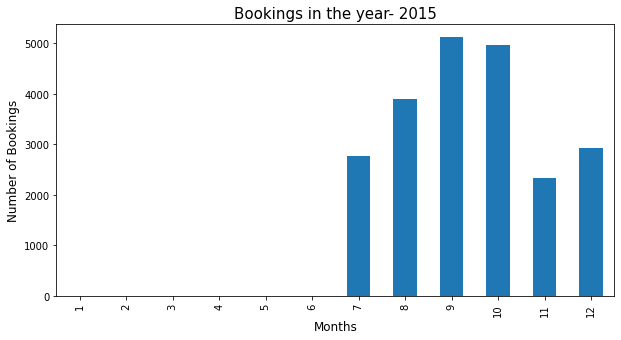

In [17]:
plt.rcParams['figure.figsize']=(10,5)
# plt.plot(bookings_in2015)
bookings_in2015.plot(kind='bar')
plt.title('Bookings in the year- 2015',fontsize=15)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Number of Bookings',fontsize=12)
plt.show()

In [18]:
bookings_in2016=per_month_booking_for_each_year.iloc[1]

In [19]:
bookings_in2016

month_number
1     2248.0
2     3891.0
3     4824.0
4     5428.0
5     5478.0
6     5292.0
7     4572.0
8     5063.0
9     5394.0
10    6203.0
11    4454.0
12    3860.0
Name: 2016, dtype: float64

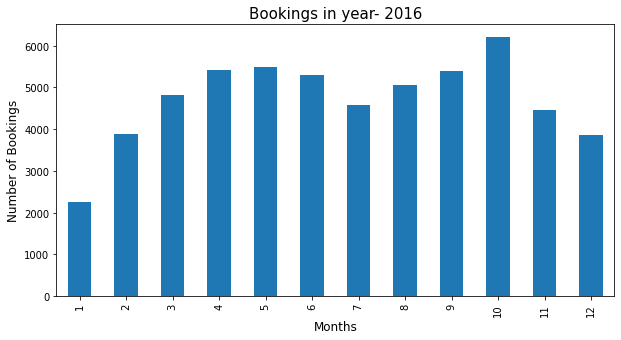

In [20]:
bookings_in2016.plot(kind='bar')
plt.title('Bookings in year- 2016',fontsize=15)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Number of Bookings',fontsize=12)
plt.show()

In [21]:
bookings_in2017=per_month_booking_for_each_year.iloc[2]

In [22]:
bookings_in2017

month_number
1     3681.0
2     4177.0
3     4970.0
4     5661.0
5     6313.0
6     5647.0
7     5313.0
8     4925.0
9        0.0
10       0.0
11       0.0
12       0.0
Name: 2017, dtype: float64

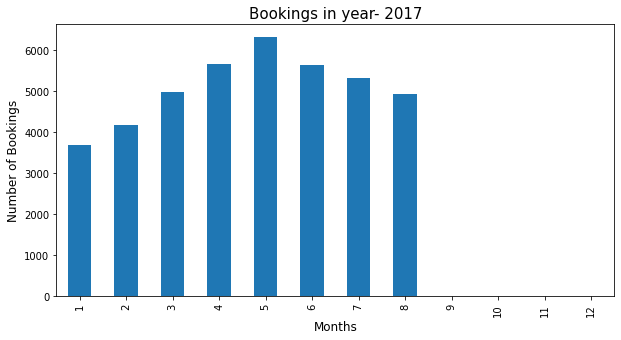

In [23]:
bookings_in2017.plot(kind='bar')
plt.title('Bookings in year- 2017',fontsize=15)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Number of Bookings',fontsize=12)
plt.show()

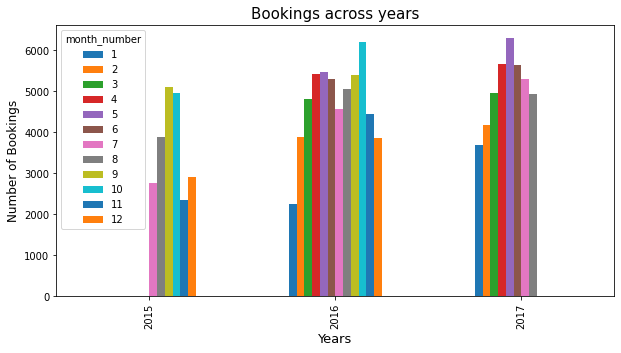

In [31]:
per_month_booking_for_each_year.plot(kind='bar')
plt.title('Bookings across years',fontsize=15)
plt.xlabel('Years',fontsize=13)
plt.ylabel('Number of Bookings',fontsize=12)
plt.show()